# Apartat C

## Setup

* Importem les llibreries
* Configurem pandas
* Importem el dataset
* Inspeccionem les dimensions de les dades

In [161]:
## APARTADO C

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy.stats import normaltest, kstest, boxcox


# Visualitzarem 4 decimals per mostra
pd.set_option('display.float_format', lambda x: '%.4f' % x)

dataset = pd.read_csv("Consumo_cerveja.txt", header=0, delimiter=',', decimal=".", names=["DATA","TEMPMED","TEMPMIN","TEMPMAX","PREC","FINSEM","CONSUM"])
dataset = dataset.assign(TEMP_DIFF= dataset.TEMPMAX - dataset.TEMPMIN)
dataset = dataset.assign(TEMP_SUM= (dataset.TEMPMAX + dataset.TEMPMIN + dataset.TEMPMED))
dataset = dataset.assign(TEMP_MUL= (dataset.TEMPMAX * dataset.TEMPMIN * dataset.TEMPMED))
'''
dataset = dataset.assign(MONTH = dataset.DATA.apply(lambda data: data.split("-")[1]))
dataset = dataset.assign(JANUARY = dataset.MONTH.apply(lambda month: 1 if month == '01' else 0))
dataset = dataset.assign(FEBRUARY = dataset.MONTH.apply(lambda month: 1 if month == '02' else 0))
dataset = dataset.assign(MARCH = dataset.MONTH.apply(lambda month: 1 if month == '03' else 0))
dataset = dataset.assign(APRIL = dataset.MONTH.apply(lambda month: 1 if month == '04' else 0))
dataset = dataset.assign(MAY = dataset.MONTH.apply(lambda month: 1 if month == '05' else 0))
dataset = dataset.assign(JUNE = dataset.MONTH.apply(lambda month: 1 if month == '06' else 0))
dataset = dataset.assign(JULY = dataset.MONTH.apply(lambda month: 1 if month == '07' else 0))
dataset = dataset.assign(AUGUST = dataset.MONTH.apply(lambda month: 1 if month == '08' else 0))
dataset = dataset.assign(SEPTEMBER = dataset.MONTH.apply(lambda month: 1 if month == '09' else 0))
dataset = dataset.assign(OCTOBER = dataset.MONTH.apply(lambda month: 1 if month == '10' else 0))
dataset = dataset.assign(NOVEMBER = dataset.MONTH.apply(lambda month: 1 if month == '11' else 0))
dataset = dataset.assign(DECEMBER = dataset.MONTH.apply(lambda month: 1 if month == '12' else 0))
dataset = dataset.assign(MONTH = dataset.MONTH.apply(lambda month: int(month)))
'''
prec_norm, _ = boxcox(dataset["PREC"] + 0.01)
dataset = dataset.assign(PREC_NORM=prec_norm)
#dataset = dataset[["DATA","MONTH", "JANUARY", "FEBRUARY", "MARCH", "APRIL", "MAY", "JUNE", "JULY", "AUGUST", "SEPTEMBER", "OCTOBER", "NOVEMBER", "DECEMBER",  "TEMPMED","TEMPMIN","TEMPMAX","PREC", "PREC_NORM","FINSEM","TEMP_DIFF", "TEMP_SUM", "TEMP_MUL", "CONSUM"]]
dataset = dataset[["DATA", "TEMPMED","TEMPMIN","TEMPMAX","PREC", "PREC_NORM","FINSEM","TEMP_DIFF", "TEMP_SUM", "TEMP_MUL", "CONSUM"]]
data = dataset.values
x = data[:, 1:-1]
y = data[:, -1]

print("Dimensionalitat de la BBDD:", dataset.shape)
print("Dimensionalitat de les entrades X", x.shape)
print("Dimensionalitat de l'atribut Y", y.shape)





Dimensionalitat de la BBDD: (365, 11)
Dimensionalitat de les entrades X (365, 9)
Dimensionalitat de l'atribut Y (365,)


## Mostrem les característiques del dataset

* Número d'entrades
* Descripció de les columnes
    * Nom de cada columna
    * Quantitat de registres amb valor
    * Si pot ser null o no
    * Tipus de dada

La part del tipus de dada es especialment important. Si les dades no s'importen com a números no podrem treballar correctament amb el dataset.

In [162]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   DATA       365 non-null    object 
 1   TEMPMED    365 non-null    float64
 2   TEMPMIN    365 non-null    float64
 3   TEMPMAX    365 non-null    float64
 4   PREC       365 non-null    float64
 5   PREC_NORM  365 non-null    float64
 6   FINSEM     365 non-null    int64  
 7   TEMP_DIFF  365 non-null    float64
 8   TEMP_SUM   365 non-null    float64
 9   TEMP_MUL   365 non-null    float64
 10  CONSUM     365 non-null    int64  
dtypes: float64(8), int64(2), object(1)
memory usage: 31.5+ KB


## Busquem valors nulls

No n'hi ha cap.

In [163]:
print("Per comptar el nombre de valors no existents:")
print(dataset.isnull().sum())

Per comptar el nombre de valors no existents:
DATA         0
TEMPMED      0
TEMPMIN      0
TEMPMAX      0
PREC         0
PREC_NORM    0
FINSEM       0
TEMP_DIFF    0
TEMP_SUM     0
TEMP_MUL     0
CONSUM       0
dtype: int64


## Visualitzem els primers registres

In [164]:
print("Per visualitzar les primeres 5 mostres de la BBDD:")
dataset.head()

Per visualitzar les primeres 5 mostres de la BBDD:


,DATA,TEMPMED,TEMPMIN,TEMPMAX,PREC,PREC_NORM,FINSEM,TEMP_DIFF,TEMP_SUM,TEMP_MUL,CONSUM
0,2015-01-01,27.3000,23.9000,32.5000,0.0000,-8.2385,0,8.6000,83.7000,21205.2750,25461
1,2015-01-02,27.0200,24.5000,33.5000,0.0000,-8.2385,0,9.0000,85.0200,22176.6650,28972
2,2015-01-03,24.8200,22.4000,29.9000,0.0000,-8.2385,1,7.5000,77.1200,16623.4432,30814
3,2015-01-04,23.9800,21.5000,28.6000,1.2000,0.1865,1,7.1000,74.0800,14745.3020,29799
4,2015-01-05,23.8200,21.0000,28.3000,0.0000,-8.2385,0,7.3000,73.1200,14156.2260,28900


In [165]:
print("Per veure estadístiques dels atributs numèrics de la BBDD:")
dataset.describe()

Per veure estadístiques dels atributs numèrics de la BBDD:


,TEMPMED,TEMPMIN,TEMPMAX,PREC,PREC_NORM,FINSEM,TEMP_DIFF,TEMP_SUM,TEMP_MUL,CONSUM
count,365.0000,365.0000,365.0000,365.0000,365.0000,365.0000,365.0000,365.0000,365.0000,365.0000
mean,21.2264,17.4614,26.6115,5.1967,-4.4780,0.2849,9.1501,65.2992,10459.9470,25401.3671
std,3.1801,2.8262,4.3174,12.4178,4.6657,0.4520,3.1946,9.6954,4445.6315,4399.1427
min,12.9000,10.6000,14.5000,0.0000,-8.2385,0.0000,2.5000,38.4000,2057.5500,14343.0000
25%,19.0200,15.3000,23.8000,0.0000,-8.2385,0.0000,6.7000,58.6400,6984.1440,22008.0000
50%,21.3800,17.9000,26.9000,0.0000,-8.2385,0.0000,9.4000,65.7600,10176.3116,24867.0000
75%,23.2800,19.6000,29.4000,3.2000,1.0217,1.0000,11.4000,71.8800,13102.2864,28631.0000
max,28.8600,24.5000,36.5000,94.8000,2.8104,1.0000,18.1000,87.4200,23541.7104,37937.0000


# Histogrames i Boxplots

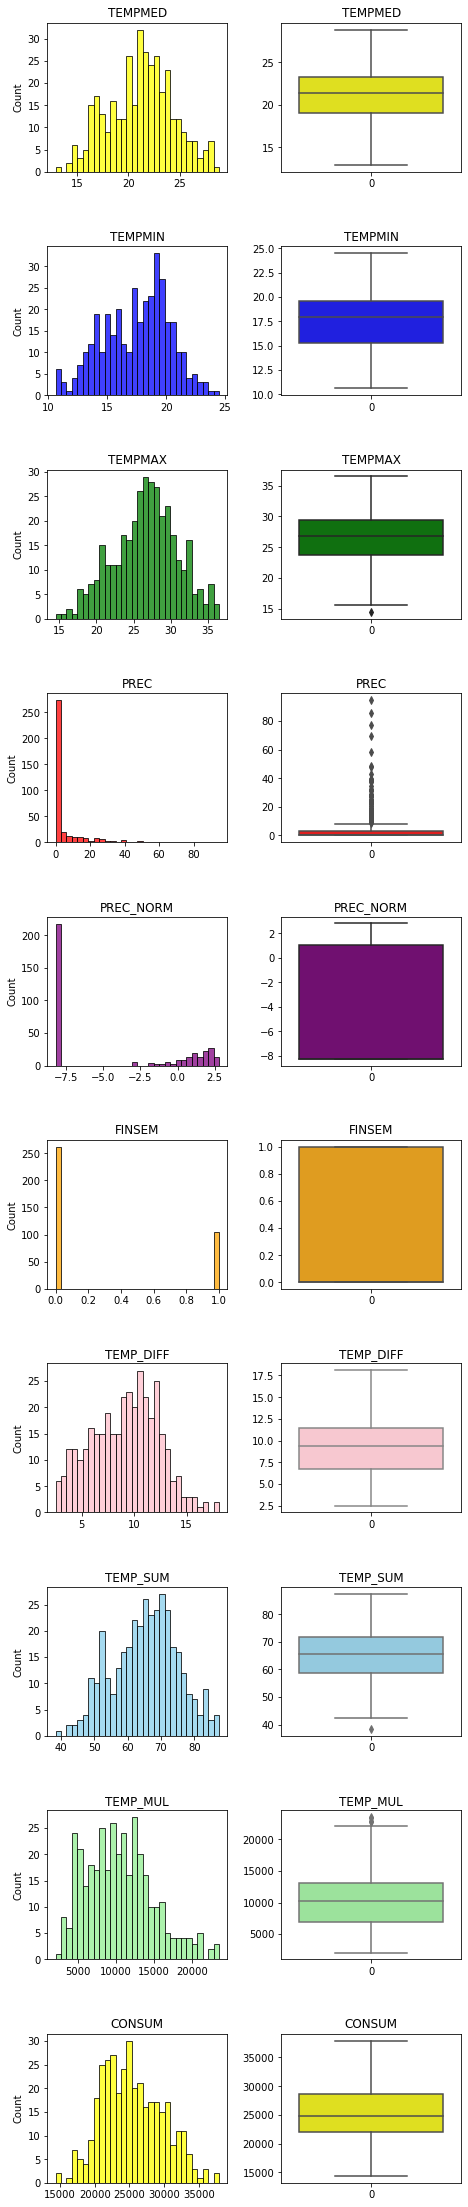

In [166]:

fig, axes = plt.subplots(10,2, figsize=(10, 30))

# "TEMPMED","TEMPMIN","TEMPMAX","PREC","FINSEM", "CONSUM"
sns.histplot(x=dataset["TEMPMED"], color='yellow', ax=axes[0,0], bins=30)
sns.histplot(x=dataset["TEMPMIN"], color='blue', ax=axes[1, 0], bins=30)
sns.histplot(x=dataset["TEMPMAX"], color='green', ax=axes[2, 0], bins=30)
sns.histplot(x=dataset["PREC"], color='red', ax=axes[3, 0], bins=30)
sns.histplot(x=dataset["PREC_NORM"], color='purple', ax=axes[4, 0], bins=30)
sns.histplot(x=dataset["FINSEM"], color='orange', ax=axes[5, 0], bins=30)
sns.histplot(x=dataset["TEMP_DIFF"], color='pink', ax=axes[6, 0], bins=30)
sns.histplot(x=dataset["TEMP_SUM"], color='skyblue', ax=axes[7, 0], bins=30)
sns.histplot(x=dataset["TEMP_MUL"], color='lightgreen', ax=axes[8, 0], bins=30)
sns.histplot(x=dataset["CONSUM"], color='yellow', ax=axes[9, 0], bins=30)


sns.boxplot(data=dataset["TEMPMED"], color='yellow', ax=axes[0,1])
sns.boxplot(data=dataset["TEMPMIN"], color='blue', ax=axes[1, 1])
sns.boxplot(data=dataset["TEMPMAX"], color='green', ax=axes[2, 1])
sns.boxplot(data=dataset["PREC"], color='red', ax=axes[3, 1])
sns.boxplot(data=dataset["PREC_NORM"], color='purple', ax=axes[4, 1])
sns.boxplot(data=dataset["FINSEM"], color='orange', ax=axes[5, 1])
sns.boxplot(data=dataset["TEMP_DIFF"], color='pink', ax=axes[6, 1])
sns.boxplot(data=dataset["TEMP_SUM"], color='skyblue', ax=axes[7, 1])
sns.boxplot(data=dataset["TEMP_MUL"], color='lightgreen', ax=axes[8, 1])
sns.boxplot(data=dataset["CONSUM"], color='yellow', ax=axes[9, 1])


plt.subplots_adjust(bottom=0, right=0.7, top=1, wspace=0.3, hspace=0.5)

axes[0,0].set_title('TEMPMED')
axes[1,0].set_title('TEMPMIN')
axes[2,0].set_title('TEMPMAX')
axes[3,0].set_title('PREC')
axes[4,0].set_title('PREC_NORM')
axes[5,0].set_title('FINSEM')
axes[6,0].set_title('TEMP_DIFF')
axes[7,0].set_title('TEMP_SUM')
axes[8,0].set_title('TEMP_MUL')
axes[9,0].set_title('CONSUM')


axes[0,0].set_xlabel(None)
axes[1,0].set_xlabel(None)
axes[2,0].set_xlabel(None)
axes[3,0].set_xlabel(None)
axes[4,0].set_xlabel(None)
axes[5,0].set_xlabel(None)
axes[6,0].set_xlabel(None)
axes[7,0].set_xlabel(None)
axes[8,0].set_xlabel(None)
axes[9,0].set_xlabel(None)

axes[0,1].set_title('TEMPMED')
axes[1,1].set_title('TEMPMIN')
axes[2,1].set_title('TEMPMAX')
axes[3,1].set_title('PREC')
axes[4,1].set_title('PREC_NORM')
axes[5,1].set_title('FINSEM')
axes[6,1].set_title('TEMP_DIFF')
axes[7,1].set_title('TEMP_SUM')
axes[8,1].set_title('TEMP_MUL')
axes[9,1].set_title('CONSUM')


plt.show()

## Mostrem correlacions

Mostrem les correlacions entre els atributs numerics.

El que ens importa especialment son les correlacions entre l'atribut de consum i la resta d'atributs.

Utilitzem el seguent criteri per les correlacions segons el seu valor absolut:
* \[0, 0.3) -> sense correlacio
* \[0.3, 0.5) -> correlacio baixa
* \[0.5, 0.7) -> correlacio mitja
* \[0.7, 0.9) -> correlacio alta
* \[0.9, 1\] -> correlacio molt alta

Veiem les seguents correlacions:
* Consum i temperatura mitjana: correlacio mitja
* Consum i temperatura minima: correlacio baixa
* Consum i temperatura maxima: correlacio mitja
* Consum i precipitacio: sense correlacio
* Consum i cap de setmana: correlacio mitja
      
No hi ha cap variable que tingui correlacio alta o molt alta amb el consum.
    

També hi ha correlacions mitjes o altes entre les diferents mostres de temperatures (minima, mitjana, maxima).

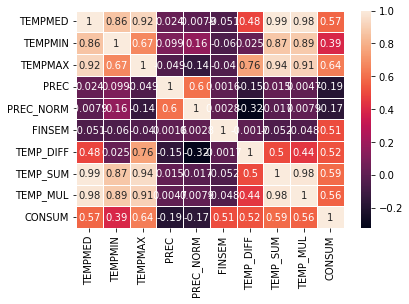

In [167]:
co = dataset.corr()
plt.figure()

ax = sns.heatmap(co, annot=True, linewidths=.5)

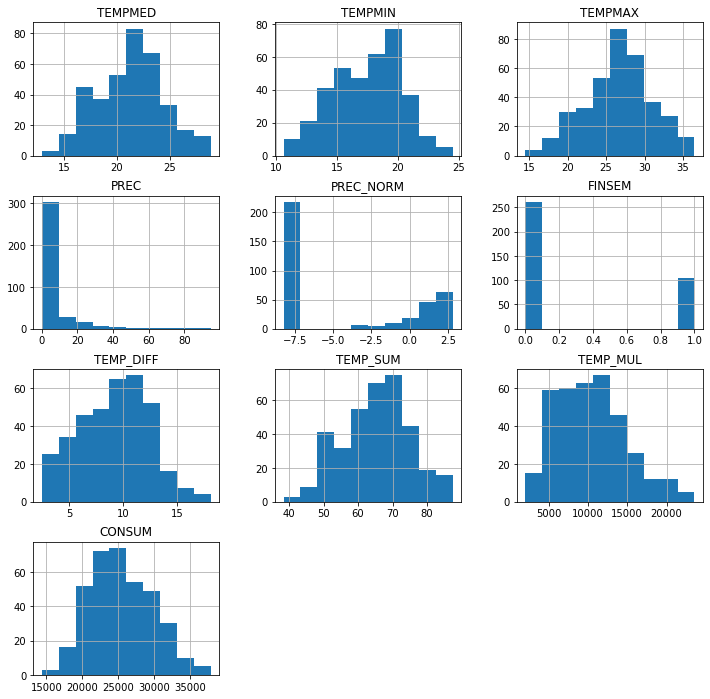

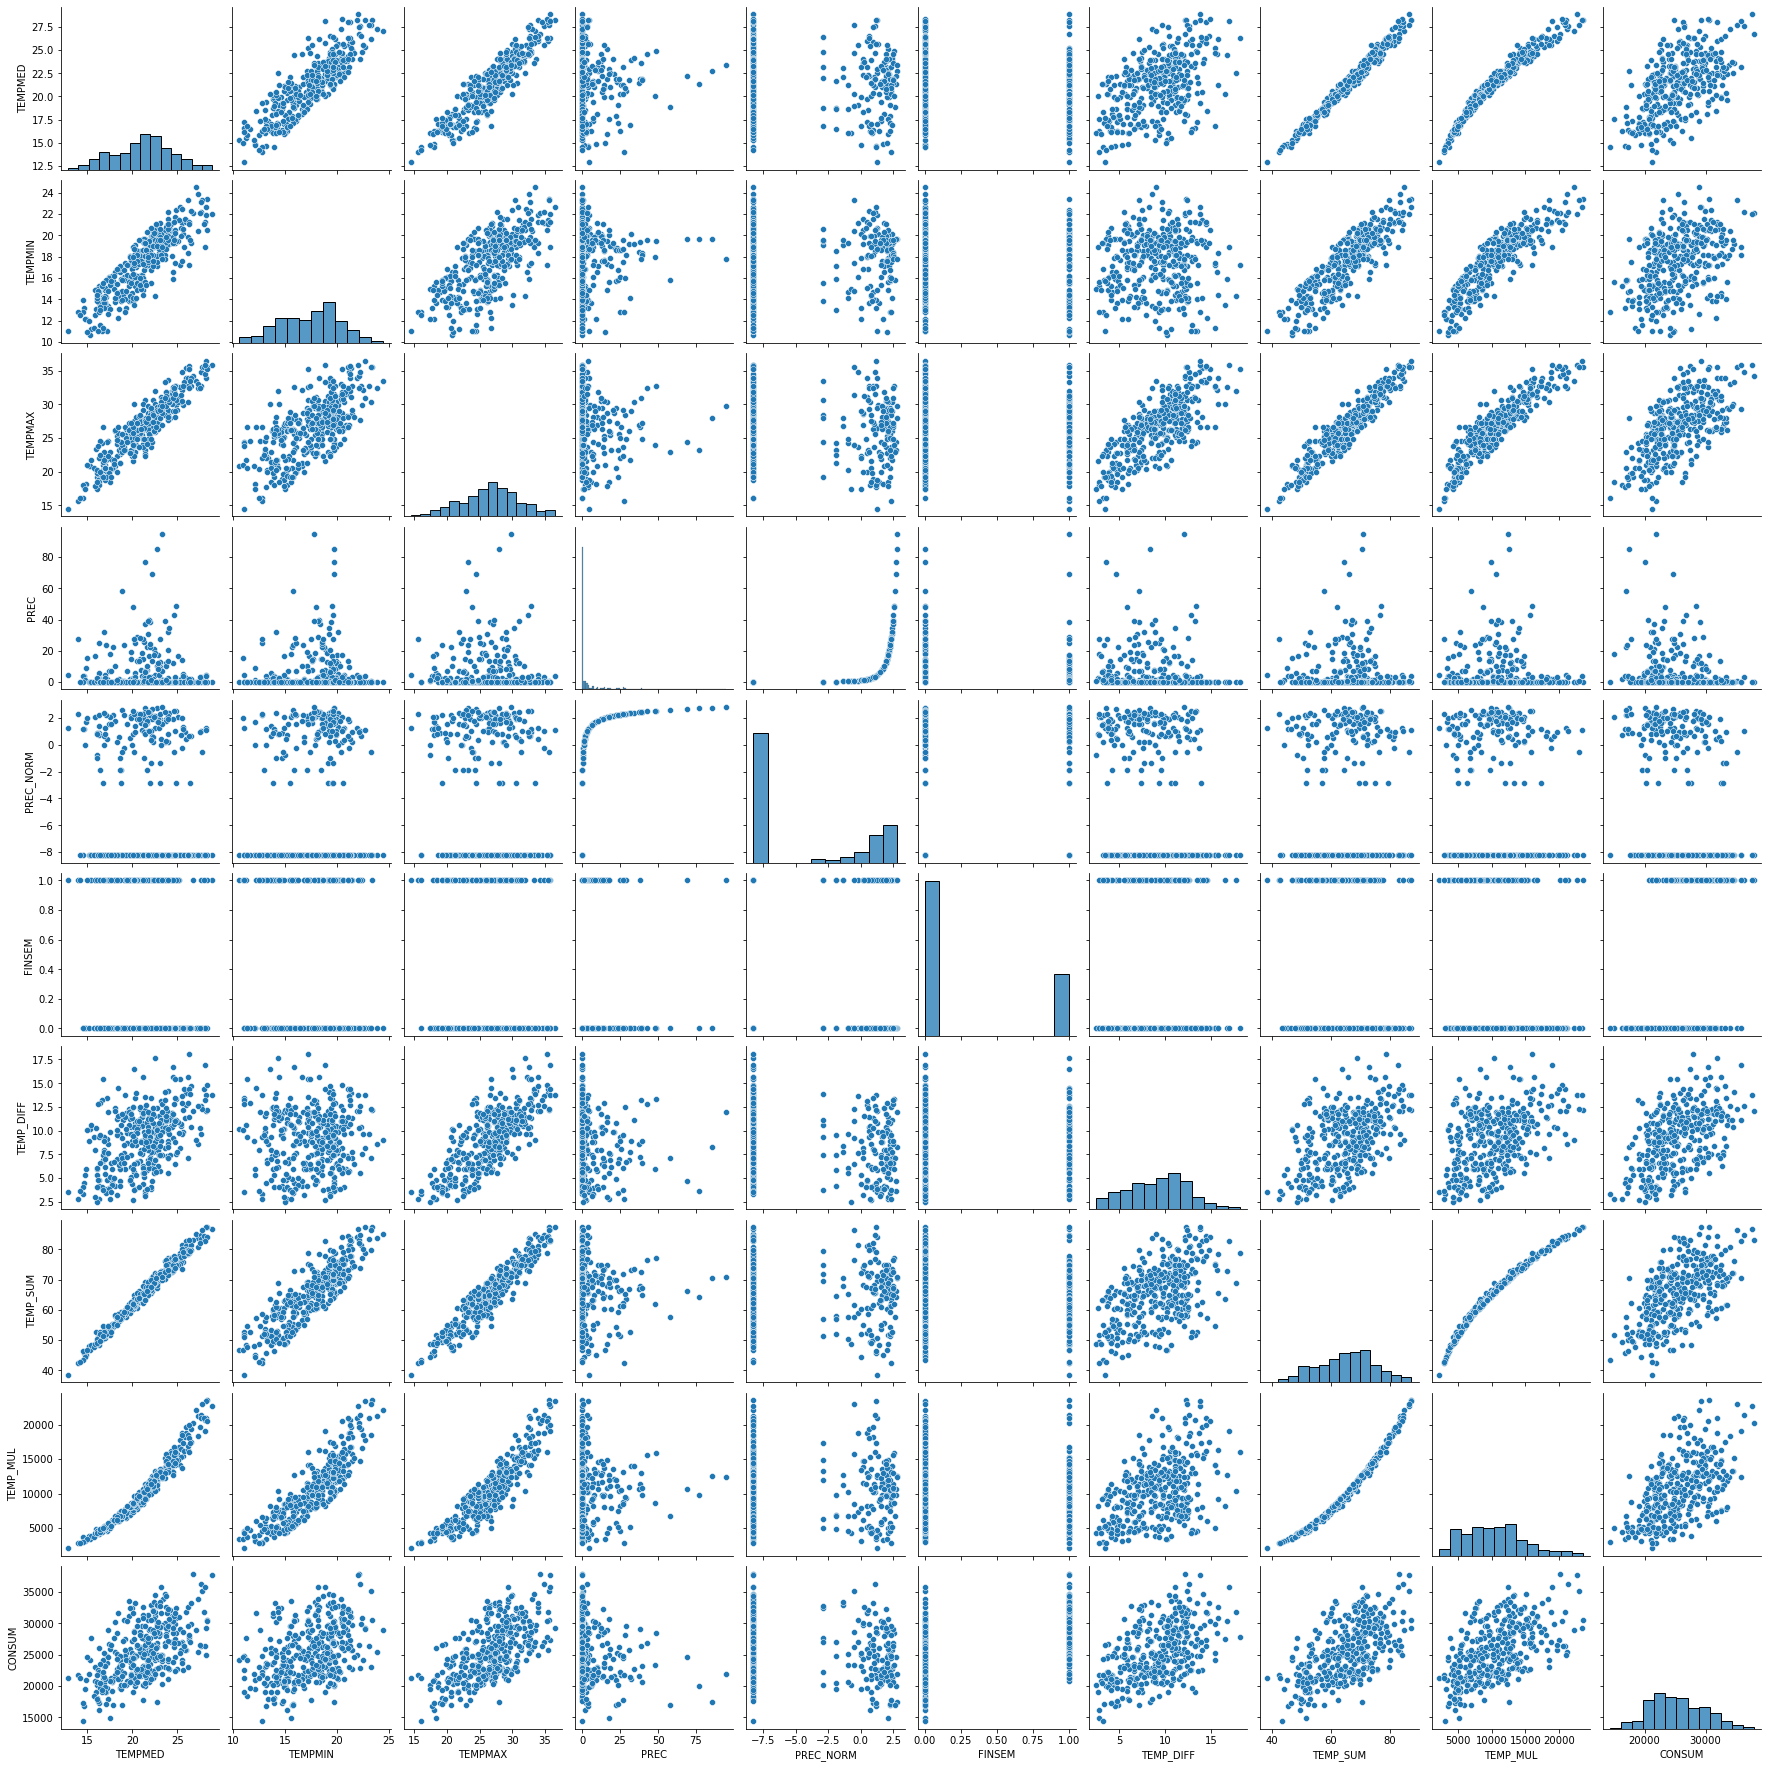

In [168]:
dataset.hist(figsize=(12, 12))
rel = sns.pairplot(dataset)

# Fem tests de les distribucions

Primer fem test per a veure quins son els attributs amb una distribució normal.

Després fem tests amb el atributs no normals per intentar trobar la distribució.

In [169]:
data = dataset.values
attributes = data[:, 1:]

for idx, attribute in enumerate(attributes.T):

    stat, p = normaltest(attribute)
    alpha = .05

    if p < alpha:  # null hypothesis: x comes from a normal distribution
        print(f"{dataset.columns[idx + 1]}: The null hypothesis can be rejected")
    else:
        print(f"{dataset.columns[idx + 1]}: The null hypothesis cannot be rejected (comes from a normal dist)")

TEMPMED: The null hypothesis cannot be rejected (comes from a normal dist)
TEMPMIN: The null hypothesis can be rejected
TEMPMAX: The null hypothesis cannot be rejected (comes from a normal dist)
PREC: The null hypothesis can be rejected
PREC_NORM: The null hypothesis can be rejected
FINSEM: The null hypothesis can be rejected
TEMP_DIFF: The null hypothesis can be rejected
TEMP_SUM: The null hypothesis cannot be rejected (comes from a normal dist)
TEMP_MUL: The null hypothesis can be rejected
CONSUM: The null hypothesis can be rejected


Veiem que només TEMPMED, TEMPMAX, TEMPMITJA passen el test normal i per tant son els unics atributs que tenen una distribució normal.

Fem més tests amb kstest per trobar les distribucions que no son normals.

In [170]:
def get_best_distribution(data):
    dist_names = ["norm", "expon", "exponweib", "gamma", "weibull_max", "weibull_min", "pareto"]
    dist_results = []
    params = {}
    for dist_name in dist_names:
        dist = getattr(scipy.stats, dist_name)
        param = dist.fit(data)

        params[dist_name] = param
        # Applying the Kolmogorov-Smirnov test
        D, p = kstest(data, dist_name, args=param)
        print("p value for "+dist_name+" = "+str(p))
        dist_results.append((dist_name, p))

    # select the best fitted distribution
    best_dist, best_p = (max(dist_results, key=lambda item: item[1]))
    # store the name of the best fit and its p value

    print("Best fitting distribution: "+str(best_dist))
    print("Best p value: "+ str(best_p))
    print("Parameters for the best fit: "+ str(params[best_dist]))

    return best_dist, best_p, params[best_dist]

for idx, attribute in enumerate(attributes.T):
    attribute = attribute.astype(float)
    print()
    print(f"Checking distribution for {dataset.columns[idx + 1]}")
    get_best_distribution(attribute)


Checking distribution for TEMPMED
p value for norm = 0.4141054004329847
p value for expon = 7.898135108252023e-26
p value for exponweib = 5.152369437201169e-138
p value for gamma = 0.33245410381629237
p value for weibull_max = 6.271911886501876e-174
p value for weibull_min = 7.362755221458028e-189
p value for pareto = 2.3666291155656745e-34
Best fitting distribution: norm
Best p value: 0.4141054004329847
Parameters for the best fit: (21.226356164383564, 3.1757483655614323)

Checking distribution for TEMPMIN
p value for norm = 0.03900400150940175
p value for expon = 2.873549443357314e-23
p value for exponweib = 0.40134842374024726
p value for gamma = 0.024807978338241776
p value for weibull_max = 2.7686557538724396e-189
p value for weibull_min = 0.1381282904611767
p value for pareto = 3.6432815369957574e-32
Best fitting distribution: exponweib
Best p value: 0.40134842374024726
Parameters for the best fit: (0.36594389839487174, 5.663574446037258, 10.116390565328174, 10.318940312617368)


Estas son las distribuciones que encontramos.

## Descartem atributs

Com que les precipitacions no tenen correlacio amb el consum, i tampoc segueixen una distribució Gaussiana, el descartem.
Com que la temperatura mínima te correlació baixa, la descartem també.
I com hem descartat alguns valors, actualitzem els valors a x.

In [171]:
dataset2 = dataset.drop(['DATA', 'PREC', 'PREC_NORM'], axis=1)

data = dataset2.values
x = data[:, :-1]
y = data[:, -1]

# Apartat B

Primer començem creant les funcions de cada regressió per posteriorment poder cridar-les més facilment 

In [172]:
## APARTADO B

import math
import numpy as np #importem la llibreria
np.warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet, RANSACRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

def mse(v1, v2):
    return ((v1 - v2)**2).mean()

def linearReg(x, y):
    # Creem un objecte de regressió de sklearn
    regr = LinearRegression()
    # Entrenem el model per a predir y a partir de x
    regr.fit(x, y)
    # Retornem el model entrenat
    return regr

def lassoReg(x, y):
    regr = Lasso()
    regr.fit(x, y)
    return regr

def ridgeReg(x, y):
    regr = Ridge()
    regr.fit(x, y)
    return regr

def elasticReg(x, y):
    regr = ElasticNet()
    regr.fit(x, y)
    return regr

def ransacReg(x, y):
    regr = RANSACRegressor()
    regr.fit(x, y)
    return regr


Després de definir les funcions per als diferents tipus de regressions, hem decidit provar diferents tipus de feature scaling. Aquests sent els dos tipus més utilitzats, anomenats normalització (min-max feature scaling) i estandardització (standard score). 

In [173]:
def normalize(x_train, minimum=None, maximum=None):
    if minimum is None:
        minimum = x_train.min(0)
    if maximum is None:
        maximum = x_train.max(0)

    x_t = x_train - minimum
    x_t /= maximum - minimum
    
    return x_t, maximum, minimum

def normalize_train_test(x_train, x_test):
    x_train, maximum, minimum = normalize(x_train)
    x_test, _, _ = normalize(x_test)
    
    return x_train, x_test, maximum, minimum


def standarize(x, mean=None, std=None):
    if mean is None:
        mean = x.mean(0)
    if std is None:
        std = x.std(0)
    
    return (x - mean[None, :]) / std[None, :], mean, std

def standarize_train_test(x_train, x_test):
    x_train, mean, std = standarize(x_train)
    x_test, _, _ = standarize(x_test, mean=mean, std=std)
    
    return x_train, x_test, mean, std

def standarize_y(y, mean=None, std=None):
    if mean is None:
        mean = y.mean(0)
    if std is None:
        std = y.std(0)
    
    return (y - mean) / std, mean, std

def standarize_train_test_y(y_train, y_test):
    y_train, mean, std = standarize_y(y_train)
    y_test, _, _ = standarize_y(y_test, mean=mean, std=std)
    
    return y_train, y_test, mean, std

x = x.astype(float)
y = y.astype(float)


In [174]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)


x_train_std, x_test_std, x_mean, x_std = standarize_train_test(x_train, x_test)
y_train_std, y_test_std, y_mean, y_std = standarize_train_test_y(y_train, y_test)


x_train_norm, x_test_norm, x_max, x_min = normalize_train_test(x_train, x_test)
y_train_norm, y_test_norm, y_max, y_min = normalize_train_test(y_train, y_test)


In [175]:

regr = linearReg(x_train, y_train)
error = mse(y_test, regr.predict(x_test)) # calculem error
r2 = r2_score(y_test, regr.predict(x_test))
kfold_score = cross_val_score(regr, x_train, y_train, scoring='r2', cv=5).mean()
print()

print("Linear Regression sense normalitzar:")
print("Error MSE: %f" % (error))
print("R2 score: %f" % (r2))
print("R2 score (K-Fold): %f" % (kfold_score))


regr = linearReg(x_train_norm, y_train_norm)
error = mse(y_test_norm, regr.predict(x_test_norm)) # calculem error
r2 = r2_score(y_test_norm, regr.predict(x_test_norm))
kfold_score = cross_val_score(regr, x_train_norm, y_train_norm, scoring='r2', cv=5).mean()
print()
print("Linear Regression normalized:")
print("Error MSE: %f" % (error))
print("R2 score: %f" % (r2))
print("R2 score (K-Fold): %f" % (kfold_score))


regr = linearReg(x_train_std, y_train_std)
error = mse(y_test_std, regr.predict(x_test_std)) # calculem error
r2 = r2_score(y_test_std, regr.predict(x_test_std))
kfold_score = cross_val_score(regr, x_train_std, y_train_std, scoring='r2', cv=5).mean()
print()
print("Linear Regression standarized:")
print("Error MSE: %f" % (error))
print("R2 score: %f" % (r2))
print("R2 score (K-Fold): %f" % (kfold_score))



Linear Regression sense normalitzar:
Error MSE: 5677695.231872
R2 score: 0.647257
R2 score (K-Fold): 0.680731

Linear Regression normalized:
Error MSE: 131906354498882794160128.000000
R2 score: -2300872710351138261565440.000000
R2 score (K-Fold): 0.680468

Linear Regression standarized:
Error MSE: 0.284013
R2 score: 0.647257
R2 score (K-Fold): 0.680731


Com es pot veure als resultats anteriors, la majoria de vegades que hem executat el codi ens ha donat un major r2 score i r2 score k-fold al utilitzar la esandardització, per lo tant per el que queda de projecte utilitzarem aquesta.

In [176]:
x_train, x_test, y_train, y_test = x_train_std, x_test_std, y_train_std, y_test_std

In [177]:

print("Linear Regression per atributs:")
print(*dataset2.columns[:-1])
for i in range(len(dataset2.columns[:-1])):
    x_t = x_train[:,i] # seleccionem atribut i en conjunt de train
    x_v = x_test[:,i] # seleccionem atribut i en conjunt de test.
    x_t = np.reshape(x_t,(x_t.shape[0],1))
    x_v = np.reshape(x_v,(x_v.shape[0],1))

    regr = linearReg(x_t, y_train_std)    
    error = mse(y_test, regr.predict(x_v)) # calculem error
    r2 = r2_score(y_test, regr.predict(x_v))
    kfold_score = cross_val_score(regr, x_t, y_train, scoring='r2', cv=5).mean()

    print()
    print("Error en atribut %s: %f" %(dataset2.columns[i], error))
    print("R2 score en atribut %s: %f" %(dataset2.columns[i], r2))
    print("R2 score (K-Fold) en atribut %s: %f" % (dataset2.columns[i], kfold_score))


Linear Regression per atributs:
TEMPMED TEMPMIN TEMPMAX FINSEM TEMP_DIFF TEMP_SUM TEMP_MUL

Error en atribut TEMPMED: 0.680974
R2 score en atribut TEMPMED: 0.154233
R2 score (K-Fold) en atribut TEMPMED: 0.336583

Error en atribut TEMPMIN: 0.745599
R2 score en atribut TEMPMIN: 0.073968
R2 score (K-Fold) en atribut TEMPMIN: 0.146610

Error en atribut TEMPMAX: 0.640104
R2 score en atribut TEMPMAX: 0.204993
R2 score (K-Fold) en atribut TEMPMAX: 0.423235

Error en atribut FINSEM: 0.707721
R2 score en atribut FINSEM: 0.121013
R2 score (K-Fold) en atribut FINSEM: 0.272451

Error en atribut TEMP_DIFF: 0.707492
R2 score en atribut TEMP_DIFF: 0.121297
R2 score (K-Fold) en atribut TEMP_DIFF: 0.264308

Error en atribut TEMP_SUM: 0.659216
R2 score en atribut TEMP_SUM: 0.181255
R2 score (K-Fold) en atribut TEMP_SUM: 0.350872

Error en atribut TEMP_MUL: 0.679190
R2 score en atribut TEMP_MUL: 0.156448
R2 score (K-Fold) en atribut TEMP_MUL: 0.323542


In [178]:
x = x.astype(float)
y = y.astype(float)

std_x = standarize(x)


## Elecció del tipus de regressió

A continuació, provarem diferents tipus de regressió per comprovar quina és la que s'adapta millor al nostre projecte. Les regressions que provarem inicialment i que ja hem definit al principi d'aquest apartat son: Regressió Lineal, Regressió Lasso, Regressió Ridge, Regressió ElasticNet, i Regressió Ransac. 

In [179]:
regr = linearReg(x_train, y_train)
error = mse(y_test, regr.predict(x_test)) # calculem error
r2 = r2_score(y_test, regr.predict(x_test))
kfold_score = cross_val_score(regr, x_train, y_train, scoring='r2', cv=5).mean()
print()
print("Linear Regression:")
print("Error MSE: %f" %( error))
print("R2 score: %f" %( r2))
print("R2 score (K-Fold): %f" % (kfold_score))

regr = lassoReg(x_train, y_train)
error = mse(y_test, regr.predict(x_test)) # calculem error
r2 = r2_score(y_test, regr.predict(x_test))
kfold_score = cross_val_score(regr, x_train, y_train, scoring='r2', cv=5).mean()
print()
print("Lasso:")
print("Error MSE: %f" %( error))
print("R2 score: %f" %( r2))
print("R2 score (K-Fold): %f" % (kfold_score))

regr = ridgeReg(x_train, y_train)
error = mse(y_test, regr.predict(x_test)) # calculem error
r2 = r2_score(y_test, regr.predict(x_test))
kfold_score = cross_val_score(regr, x_train, y_train, scoring='r2', cv=5).mean()
print()
print("Ridge:")
print("Error MSE: %f" %( error))
print("R2 score: %f" %( r2))
print("R2 score (K-Fold): %f" % (kfold_score))

regr = elasticReg(x_train, y_train)
error = mse(y_test, regr.predict(x_test)) # calculem error
r2 = r2_score(y_test, regr.predict(x_test))
kfold_score = cross_val_score(regr, x_train, y_train, scoring='r2', cv=5).mean()
print()
print("ElasticNet:")
print("Error MSE: %f" %( error))
print("R2 score: %f" %( r2))
print("R2 score (K-Fold): %f" % (kfold_score))

regr = ransacReg(x_train, y_train)
error = mse(y_test, regr.predict(x_test)) # calculem error
r2 = r2_score(y_test, regr.predict(x_test))
kfold_score = cross_val_score(regr, x_train, y_train, scoring='r2', cv=5).mean()
print()
print("RANSAC:")
print("Error MSE: %f" %( error))
print("R2 score: %f" %( r2))
print("R2 score (K-Fold): %f" % (kfold_score))


Linear Regression:
Error MSE: 0.284013
R2 score: 0.647257
R2 score (K-Fold): 0.680731

Lasso:
Error MSE: 0.832502
R2 score: -0.033965
R2 score (K-Fold): -0.002969

Ridge:
Error MSE: 0.283290
R2 score: 0.648155
R2 score (K-Fold): 0.681138

ElasticNet:
Error MSE: 0.700471
R2 score: 0.130017
R2 score (K-Fold): 0.143606

RANSAC:
Error MSE: 0.326512
R2 score: 0.594474
R2 score (K-Fold): 0.668352


Seguidament, calcularem el PCA per saber quin és el nombre d'atributs idoni.

PCA_1 - MSE: 0.649; R2: 0.194; R2 K-Fold: 0.377
PCA_2 - MSE: 0.577; R2: 0.283; R2 K-Fold: 0.493
PCA_3 - MSE: 0.283; R2: 0.648; R2 K-Fold: 0.679
PCA_4 - MSE: 0.286; R2: 0.645; R2 K-Fold: 0.681
PCA_5 - MSE: 0.284; R2: 0.647; R2 K-Fold: 0.681
PCA_6 - MSE: 0.284; R2: 0.647; R2 K-Fold: 0.681


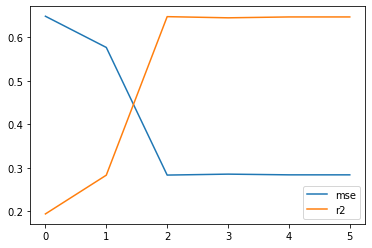

In [180]:
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

mses, r2s = [], []
for i in range(1, x_train.shape[1]):
    pca = PCA(n_components=i)
    x_train_transformed = pca.fit_transform(x_train)
    x_test_transformed = pca.transform(x_test)

    linear_model = LinearRegression()
    linear_model.fit(x_train_transformed, y_train)
    preds = linear_model.predict(x_test_transformed)

    mse = mean_squared_error(y_test, preds)
    r2 = r2_score(y_test, preds)
    kfold_score = cross_val_score(linear_model, x_train_transformed, y_train, scoring='r2', cv=5).mean()
    print(f"PCA_{i} - MSE: {mse:.3f}; R2: {r2:.3f}; R2 K-Fold: {kfold_score:.3f}")
    
    mses.append(mse)
    r2s.append(r2)
    
plt.plot(mses, label='mse')
plt.plot(r2s, label='r2')
plt.legend()
plt.show()


Com es pot veure al resultat, el nombre d'atributs idoni es 2-3 ja que es quan el mean squared error i el r2 score arriben a un punt on, o no milloren més, o milloren tant poc que no es rentable ja que com més atributs utilitza, més lenta és la regressió. 

# Regresió polinomial

Després de provar les regressions lineals anteriors, ara provarem amb regressions polinomials de grau 2 i 3 per veure si el nostre cas necessita una funció amb corva.

In [181]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)

x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

regr = linearReg(x_train_poly, y_train)

error = mean_squared_error(y_test, regr.predict(x_test_poly)) # calculem error
r2 = r2_score(y_test, regr.predict(x_test_poly))
kfold_score = cross_val_score(regr, x_train_poly, y_train, scoring='r2', cv=5).mean()
print()
print("PloynomialRegression (degree = 2):")
print("Error MSE: %f" %( error))
print("R2 score: %f" %( r2))
print("R2 score (K-Fold): %f" % (kfold_score))


poly = PolynomialFeatures(degree=3, include_bias=False)

x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

regr = linearReg(x_train_poly, y_train)

error = mean_squared_error(y_test, regr.predict(x_test_poly)) # calculem error
r2 = r2_score(y_test, regr.predict(x_test_poly))
kfold_score = cross_val_score(regr, x_train_poly, y_train, scoring='r2', cv=5).mean()
print()
print("PloynomialRegression (degree = 3):")
print("Error MSE: %f" %( error))
print("R2 score: %f" %( r2))
print("R2 score (K-Fold): %f" % (kfold_score))



PloynomialRegression (degree = 2):
Error MSE: 0.363275
R2 score: 0.548813
R2 score (K-Fold): 0.662861

PloynomialRegression (degree = 3):
Error MSE: 0.420435
R2 score: 0.477821
R2 score (K-Fold): 0.414458


Ens empitjora el resultat

# Apartat A

A continuació hem creat una classe per a poder fer un regressor lineal de zero, sense tenir que cridar a la funció de sklearn com hem fet amb anterioritat. Aquesta classe ens retorna el mean squared error, el r2 score, i el nombre d'iteracions que ha necessitat, per així poder comparar el seu rendiment amb altres classes incluïda la de sklearn. 

In [182]:
# APARTADO A

import numpy as np

class Regressor(object):
    def __init__(self, w0, w1, alpha):
        # Inicialitzem w0 i w1 (per ser ampliat amb altres w's)
        self.w0 = w0
        self.w1 = w1
        self.alpha = alpha

        
    def predict(self, x):
        # implementar aqui la funció de prediccio
        pass
    
    def __update(self, hy, y):
        # actualitzar aqui els pesos donada la prediccio (hy) i la y real.
        self.weights = self.weights - self.alpha / m * (X.transpose() * (X * self.weights - y));
    
    def train(self, max_iter, epsilon):
        # Entrenar durant max_iter iteracions o fins que la millora sigui inferior a epsilon
        iterations = 0            
        pass
    
    
class RegressorLineal(object):
    def __init__(self, w0, weights, alpha):
        # Inicialitzem w0 i w1 (per ser ampliat amb altres w's)
        self.w0 = w0
        self.weights = weights
        self.alpha = alpha
        
        self.iterations_to_converge = 0
        
    def predict(self, x):
        # implementar aqui la funció de prediccio
        return np.dot(x, self.weights) + self.w0
    
    def __update(self, x, hy, y):
        # actualitzar aqui els pesos donada la prediccio (hy) i la y real.
        w0_diff, weight_diffs = self.__gradients(x, y, hy)
        self.__update_weights(w0_diff, weight_diffs)
        
    def __gradients(self, x, real_y, predicted_y):
        error = predicted_y - real_y
        
        w0_gradient = (1 / real_y.shape[0]) * np.sum(error)
        weights_gradients = (1 / real_y.shape[0]) * np.dot(x.transpose(), error)
        
        return w0_gradient, weights_gradients
        
    def __update_weights(self, w0_diff, weight_diffs):
        self.w0 = self.w0 - self.alpha * w0_diff
        self.weights = self.weights - self.alpha * weight_diffs
    
    def train(self, x, y, max_iter, epsilon):
        # Entrenar durant max_iter iteracions o fins que la millora sigui inferior a epsilon
        iterations = 0
        self.iterations_to_converge = 0
        old_w0 = self.w0
        old_weights = self.weights.copy()
        while iterations < max_iter:
            self.iterations_to_converge += 1
            predicted_y = self.predict(x)
            
            self.__update(x, predicted_y, y)
    
            if abs(self.w0 - old_w0) < epsilon and np.allclose(self.weights, old_weights, atol=epsilon):
                return
            
            old_w0 = self.w0
            old_weights = self.weights
            iterations += 1
    
    def fit(self, x, y):
        self.train(x, y, 10000, 0.001)
        
    def get_params(self, deep=True):
        return dict(w0=self.w0, weights=self.weights, alpha=self.alpha)


    
regr = RegressorLineal(1, np.ones(len(x_train[0]), dtype=float), 0.1)

regr.train(x_train, y_train, 100000, 0.001)

y_predict = regr.predict(x_test)

error = mean_squared_error(y_test, y_predict) # calculem error
r2 = r2_score(y_test, y_predict)
print("CUSTOM Linear Regression:")
print(f"Iterations to converge: {regr.iterations_to_converge}")
print("Error: %f" %( error))
print("R2 score: %f" %( r2))


CUSTOM Linear Regression:
Iterations to converge: 45
Error: 0.284053
R2 score: 0.647207


També hem creat una classe per el regressor del tipus Ridge

In [183]:

class RegressorRidge(object):
    def __init__(self, w0, weights, alpha, l2_penalty):
        # Inicialitzem w0 i w1 (per ser ampliat amb altres w's)
        self.w0 = w0
        self.weights = weights
        self.alpha = alpha
        self.l2_penalty = l2_penalty
        
        self.iterations_to_converge = 0
        
    def predict(self, x):
        # implementar aqui la funció de prediccio
        return np.dot(x, self.weights) + self.w0
    
    def __update(self, x, hy, y):
        # actualitzar aqui els pesos donada la prediccio (hy) i la y real.
        w0_diff, weight_diffs = self.__gradients(x, y, hy)
        self.__update_weights(w0_diff, weight_diffs)
        
    def __gradients(self, x, real_y, predicted_y):
        error = predicted_y - real_y
        
        w0_gradient = (1 / real_y.shape[0]) * np.sum(error)
        
        # DIFERENCIA AMB EL REGRESOR LINEAL NORMAL
        weights_gradients = (1 / real_y.shape[0]) * (-(2 * x.transpose().dot(real_y - predicted_y)) +               
               (2 * self.l2_penalty * self.weights)) # apliquem el l2_penalty del Ridge
        
        return w0_gradient, weights_gradients
        
    def __update_weights(self, w0_diff, weight_diffs):
        self.w0 = self.w0 - self.alpha * w0_diff
        self.weights = self.weights - self.alpha * weight_diffs
    
    def train(self, x, y, max_iter, epsilon):
        # Entrenar durant max_iter iteracions o fins que la millora sigui inferior a epsilon
        iterations = 0
        self.iterations_to_converge = 0
        old_w0 = self.w0
        old_weights = self.weights.copy()
        while iterations < max_iter:
            self.iterations_to_converge += 1
            predicted_y = self.predict(x)
            
            self.__update(x, predicted_y, y)
    
            if abs(self.w0 - old_w0) < epsilon and np.allclose(self.weights, old_weights, atol=epsilon):
                return
            
            old_w0 = self.w0
            old_weights = self.weights
            iterations += 1
            
    def fit(self, x, y):
        self.train(x, y, 10000, 0.001)
        
    def get_params(self, deep=True):
        return dict(w0=self.w0, weights=self.weights, alpha=self.alpha, l2_penalty=self.l2_penalty)

            
regr = RegressorRidge(1, np.ones(len(x_train[0]), dtype=float), 0.1, 100)

regr.train(x_train, y_train, 100000, 0.001)

y_predict = regr.predict(x_test)


error = mean_squared_error(y_test, y_predict) # calculem error
r2 = r2_score(y_test, y_predict)
print("CUSTOM Ridge Regression:")
print(f"Iterations to converge: {regr.iterations_to_converge}")
print("Error: %f" %( error))
print("R2 score: %f" %( r2))

CUSTOM Ridge Regression:
Iterations to converge: 45
Error: 0.290985
R2 score: 0.638598


Com es pot veure en els dos resultats anteriors, la classe del Regressor Ridge i la del Regressor lineal ens donen resultats semblants, encara que el Regressor Ridge ho fa en un nombre menor de iteracions.

Finalment, reutilitzant la classe RegressorRidge que hem creat prèviament, hem intentat fer regressions polinomials de grau 2 i 3:

In [184]:
poly = PolynomialFeatures(degree=2, include_bias=False)

x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

regr = RegressorRidge(1, np.ones(len(x_train_poly[0]), dtype=float), 0.1, 10)

error = mean_squared_error(y_test, regr.predict(x_test_poly)) # calculem error
r2 = r2_score(y_test, regr.predict(x_test_poly))
kfold_score = cross_val_score(regr, x_train_poly, y_train, scoring='r2', cv=5).mean()
print()
print("PloynomialRegression (degree = 2):")
print("Error MSE: %f" %( error))
print("R2 score: %f" %( r2))
print("R2 score (K-Fold): %f" % (kfold_score))

poly = PolynomialFeatures(degree=3, include_bias=False)

x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

regr = RegressorRidge(1, np.ones(len(x_train_poly[0]), dtype=float), 0.1, 10)

error = mean_squared_error(y_test, regr.predict(x_test_poly)) # calculem error
r2 = r2_score(y_test, regr.predict(x_test_poly))
kfold_score = cross_val_score(regr, x_train_poly, y_train, scoring='r2', cv=5).mean()
print()
print("PloynomialRegression (degree = 3):")
print("Error MSE: %f" %( error))
print("R2 score: %f" %( r2))
print("R2 score (K-Fold): %f" % (kfold_score))


PloynomialRegression (degree = 2):
Error MSE: 979.447106
R2 score: -1215.470456
R2 score (K-Fold): nan

PloynomialRegression (degree = 3):
Error MSE: 20273.694421
R2 score: -25178.869477
R2 score (K-Fold): nan


CUSTOM Linear Regression:
Iterations to converge: 45
Error: 0.284053
R2 score: 0.647207


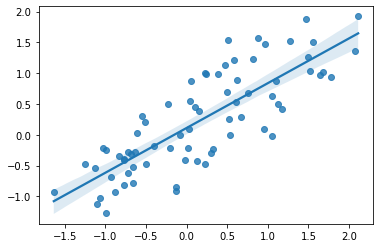

In [185]:
regr = RegressorLineal(1, np.ones(len(x_train[0]), dtype=float), 0.1)

regr.train(x_train, y_train, 100000, 0.001)

y_predict = regr.predict(x_test)

error = mean_squared_error(y_test, y_predict) # calculem error
r2 = r2_score(y_test, y_predict)
print("CUSTOM Linear Regression:")
print(f"Iterations to converge: {regr.iterations_to_converge}")
print("Error: %f" %( error))
print("R2 score: %f" %( r2))


sns.regplot(x=y_test, y=y_predict)
plt.show()